In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[ 5.1  3.5  1.4  0.2]
{0, 1, 2}


In [3]:
import requests

birthdata_url = 'http://localhost:8888/Section 1/birthweight.dat'
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\r\n')
print(len(birth_data[0]))

6005


In [4]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x)>=1] for y in housing_file.text.split('\n') if len(y)>=1]
print(len(housing_data))
print(len(housing_data[0]))

506
14


In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[1,:])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000
10000
5000
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [6]:
from PIL import Image
(X_train, y_train), (X_test, y_test) = tf.contrib.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================]170500096/170498071 [==============================] - 49s 0us/step



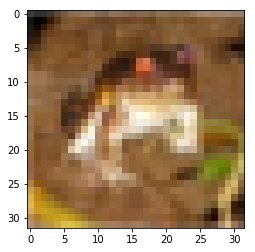

In [7]:
X_train.shape
y_train.shape
y_train[0,]
%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)

In [8]:
import requests
import io
from zipfile import ZipFile


zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')

text_data = file.decode()
text_data = text_data.encode('ascii',errors='ignore')
text_data = text_data.decode().split('\n')
text_data = [x.split('\t') for x in text_data if len(x)>=1]
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

5574
{'ham', 'spam'}
Ok lar... Joking wif u oni...


In [9]:
import requests
import io
import tarfile

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
r = requests.get(movie_data_url)
stream_data = io.BytesIO(r.content)
tmp = io.BytesIO()
while True:
    s = stream_data.read(16384)
    if not s:
        break
    tmp.write(s)
stream_data.close()
tmp.seek(0)
tar_file = tarfile.open(fileobj=tmp, mode="r:gz")
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
pos_data = []
for line in pos:
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(neg_data[0])

5331
5331
simplistic , silly and tedious . 



In [10]:
import requests

shakespeare_url = 'http://www.gutenberg.org/cache/epub/100/pg100.txt'
response = requests.get(shakespeare_url)
shakespeare_file = response.content
shakespeare_text = shakespeare_file.decode('utf-8')
shakespeare_text = shakespeare_text[7675:]
print(len(shakespeare_text))

5582212


In [11]:
import requests
import io
from zipfile import ZipFile
sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
r = requests.get(sentence_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('deu.txt')
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[10])

159204
159204
['Hello!', 'Hallo!']
